# Dağılım Ölçüleri, Örnek Teorisi

### Örnek Teorisi
Bir ilçe de ki 10.000 kişinin yaş ortalmasını öğrenmek istiyoruz. Her birine ayrı ayrı soramayacağımız için içinden 100 kişilik örneklem çıkarmaya çalışıyoruz

In [9]:
import numpy as np
populasyon = np.random.randint(0,80,10000) # 0 İle 80 yaş arası 10.000 değer oluşturuyoruz

In [10]:
populasyon[0:10]

array([58, 45, 39,  7, 28, 25, 64, 36, 18,  8])

# Örneklem Çekme İşlemi
Örneklem ve popülasyon değerlerininin ortalamarı aynı minvalde olmalıdır. Uçurum olmamalıdır

In [11]:
np.random.seed(10)
örneklem = np.random.choice(a= populasyon, size=100)
örneklem[0:10]

array([17, 74, 67, 15, 49, 53, 15, 42, 44, 16])

In [12]:
örneklem.mean() # Alt Kitle

41.52

In [13]:
populasyon.mean() # Ana Kitle 

39.4249

# Örneklem Dağılımı

In [14]:
örneklem1 = np.random.choice(a= populasyon, size=100)
örneklem2 = np.random.choice(a= populasyon, size=100)
örneklem3 = np.random.choice(a= populasyon, size=100)
örneklem4 = np.random.choice(a= populasyon, size=100)
örneklem5 = np.random.choice(a= populasyon, size=100)
örneklem6 = np.random.choice(a= populasyon, size=100)
örneklem7 = np.random.choice(a= populasyon, size=100)
örneklem8 = np.random.choice(a= populasyon, size=100)
örneklem9 = np.random.choice(a= populasyon, size=100)
örneklem10 = np.random.choice(a= populasyon, size=100)

In [15]:
(örneklem1.mean()+örneklem2.mean()+örneklem3.mean()+örneklem4.mean()+örneklem5.mean()
 +örneklem6.mean()+örneklem7.mean()+örneklem8.mean()+örneklem9.mean()+örneklem10.mean())/10

40.466

# Betimsel İstatistikler
* Ortalama     
* Medyan
* Mod
* Kartiller
* Değişim Aralığı
* Standart Sapma

1) Kovaryans

2) Korelasyon

In [16]:
import seaborn as sns
tips = sns.load_dataset("tips")
df=tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [18]:
! pip install researchpy
import researchpy as rp

## Sayısal Değişkenler İçin

In [19]:
rp.summary_cont(df[["total_bill","tip","size"]]) # Sürekli, sayısal değişkenler için kullanıyoruz

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


#### Veriable : Değişkenler
#### N :            Gözlem Sayıları
#### Mean :     Ortalama Değer
#### SD :         Standart Sapması
#### SE :         Standart Hatası
#### 95% Conf. (	Interval) : Güven Aralıkları

## Kategorik Değişkenler İçin

In [20]:
rp.summary_cat(df[["sex","smoker","day"]]) # Kategorik, Nominal değişkenler için kullanıyoruz

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


# Kovaryans Öğrenme

In [21]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


# Korelasyon Öğrenme

In [22]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


 # İş Uygulaması: Fiyat Stratejisi Karar Destek

In [23]:
fiyatlar =  np.random.randint(10,110,1000) # 10 ile 110 arasında rastgele 1000 tane fiyat

In [24]:
fiyatlar.mean() 

58.35

In [28]:
import statsmodels.stats.api as sms
import statsmodels as sm

In [26]:
# Fiyatların güven aralığıdır
sms.DescrStatsW(fiyatlar).tconfint_mean() #95 doğruluk ile olur herzaman.

(56.53235961538421, 60.167640384615794)

In [32]:
#sms.quantile(fiyatlar)

## Central Tendency (Merkezi Eğilim)
* Mean: ortalama  
* Median: bir listede ortada ki sayı
* Mode: bir listede en çok bulunan sayı
* Mean vs Median:
    * Mean outlier'lardan etkilenebilir bu nedenle mediam önemli. Mesela bir şirkette zam yapılmak istenirse neye bakmalı çalışanların maaş ortalaması yada maaş medyanı?

In [1]:
#********************************
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
#********************************
import numpy as np
from scipy import stats

yas = [1,2,3,5,6,7,7,10,12,13]
# Mean
mean_yas = np.mean(yas)
print(mean_yas)
# Median
median_yas = np.median(yas)
print(median_yas)
# Mode
mode_yas = stats.mode(yas)
print(mode_yas)

6.6
6.5
ModeResult(mode=array([7]), count=array([2]))


### Mean VS Median
* Bazen mean kullanmak yerine median kullanmak daha mantıklı olabilir.
* Mesela bir şirket düşünülem bu şirkette 10 çalışan var. Bu şirketin patronu eğer ortalama maaş 5 değerinin altındaysa her çalışana zam yapacak.

In [2]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Ortalama maaş 52.5 çıktı. Patron bu ortalama yüzünden çalışanlarına çok maaş verdiğini düşünecek ve bu nedenle maaşlarına zam yapmayacak
* Ama bildiğiniz gibi bu adil bir durum değil çünkü burada 500 değerinde  outlier diye adlandırabileceğimiz bir maaş değeri var.
* Median bu outlier değerleri engeller.

In [3]:
print("Median of salary: ",np.median(salary));

Median of salary:  3.0


* Median değeri 3. Ve bu değer maaşların gerçek değerini yansıtıyor. 5 den de küçük olduğu için patron tarafından bu çalışanlar maaşlarına zam alacaklar.

## Dispersion (Dağılım)
* Dispersion dağılım demek. (spread out)
* Range: Bir listede en büyük ve en küçük sayı arasında ki fark
* Variance: 
    * varyans-değişiklik. Listedeki tüm noktalar ortalamadan ne kadar uzaklıkta 
    * ![Time](variance.jpg)
    * Bazı formüllerde N yerine (N-1) olabilir. Bu sample variance(N-1) ve population variance(N) diye iki farklı kavram olmasından kaynaklanıyor ama şuan için çok önemli değil.
* Standard deviation (std): 
    * Variance'ın kare kökü
    * İlerde göreceğimiz dağılımlarda bir dağılımın içindeki değerlerin ortalamaya olan uzaklıklarının ne kadar olduğunu belirtmek için kullanacağımız bir kavram. Aslında çok kullanılan ve önemli bir kavram.
    * ![Time](var_vs_std.jpg)

In [6]:
# range
yas = [1,2,3,5,6,7,7,10,12,13]
print("Range: ", (np.max(yas)-np.min(yas)))

# variance
print("Variance: ", (np.var(yas)))
var = sum((yas - np.mean(yas))**2)/len(yas)
print("Variance with formula: ",var)

# std
print("Std: ", (np.std(yas)))
std = np.sqrt(sum((yas - np.mean(yas))**2)/len(yas))
print("Std with formula: ",std)

Range:  12
Variance:  15.040000000000001
Variance with formula:  15.040000000000001
Std:  3.8781438859330635
Std with formula:  3.8781438859330635


X1 mean: 14.81683732821956 and meadian: 15.000759199867357
X2 mean: 15.223370062448248 and meadian: 14.820708691348425


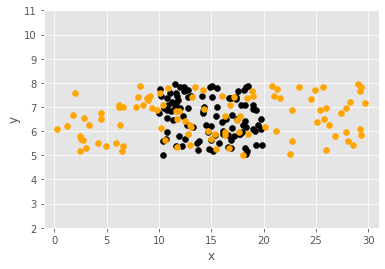

In [7]:
import matplotlib.pyplot as plt
y = np.random.uniform(5,8,100)
x1 = np.random.uniform(10,20,100)
x2 = np.random.uniform(0,30,100)
plt.scatter(x1,y,color="black")
plt.scatter(x2,y,color="orange")
plt.xlim([-1,31])
plt.ylim([2,11])
plt.xlabel("x")
plt.ylabel("y")
print("X1 mean: {} and meadian: {}".format(np.mean(x1),np.median(x1)))
print("X2 mean: {} and meadian: {}".format(np.mean(x2),np.median(x2)))

## Quartiles
* What is quartile?
    * 1,4,5,6,8,9,11,12,13,14,15,16,17
    * The median is the number that is in middle of the sequence. In this case it would be 11.
    * The lower quartile(first quartile (Q1)(25%)) is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
    * The upper quartile(third quartile (Q3)(75%)), you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.
* IQR(inter quartile range) = Q3-Q1
* Outliers: Q1 - 1.5*IQR and Q3 + 1.5*IQR sınırları dışarısında kalan değerler

In [10]:
# libraries
import pandas as pd
import seaborn as sns
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
# read data as pandas data frame
data = pd.read_csv("data.csv")
data = data.drop(['Unnamed: 32','id'],axis = 1)

In [11]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


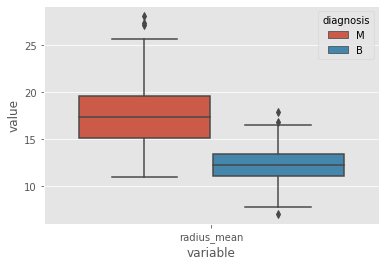

In [12]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean'])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

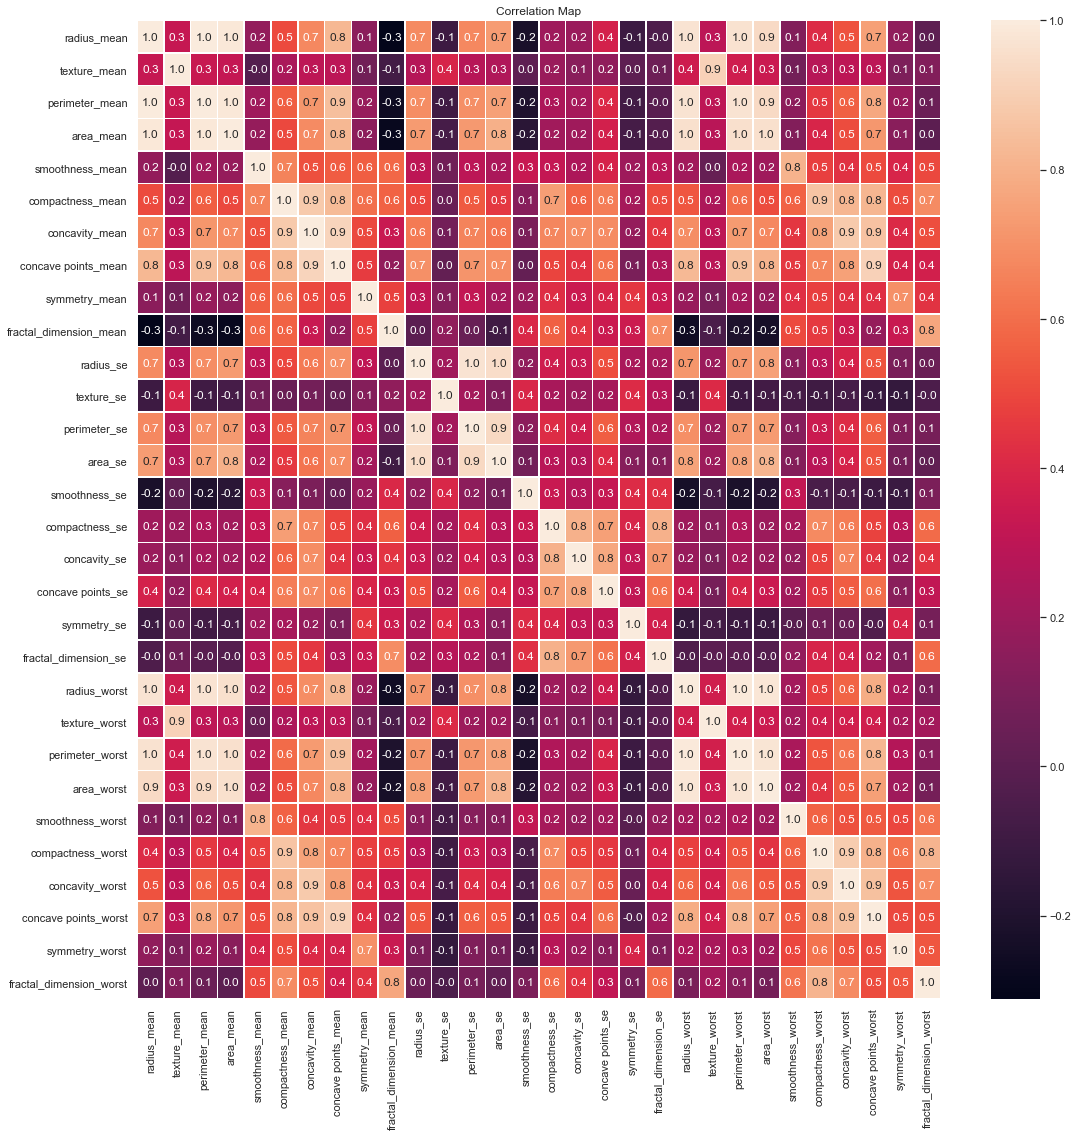

In [16]:
f,ax=plt.subplots(figsize = (18,18))
# corr() is actually pearson correlation
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

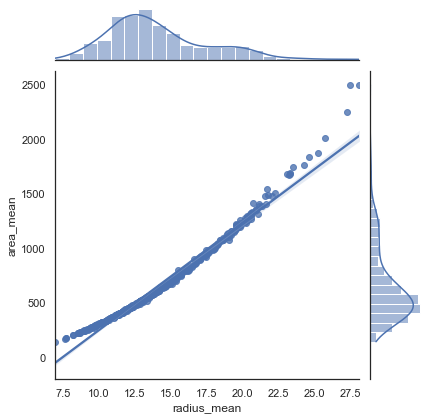

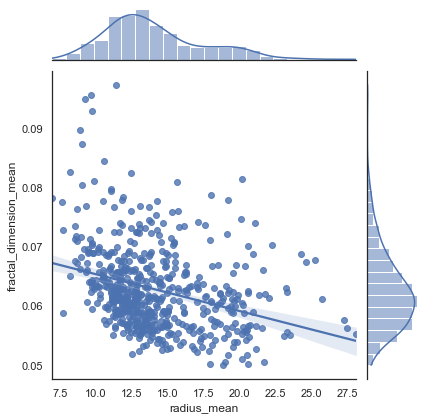

In [19]:
# plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind="reg")
sns.jointplot(data.radius_mean,data.fractal_dimension_mean,kind="reg")
plt.show()

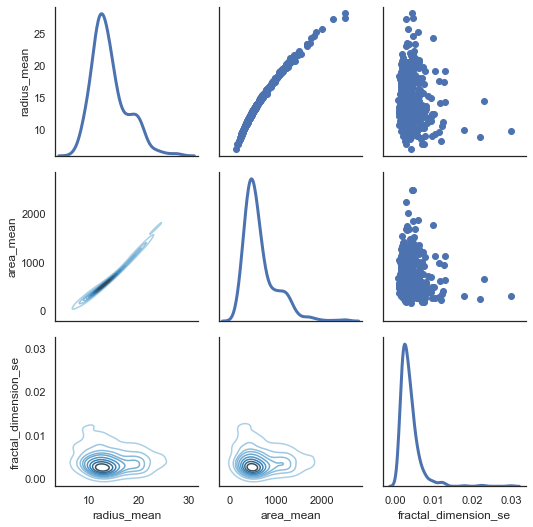

In [15]:
# Also we can look relationship between more than 2 distribution
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

* Covariance
    * Covariance is measure of the tendency of two variables to vary together
        * ![Time](covar.jpg)
    * Eğer iki vektor identical ise covariance maximum olur.
    * Eğer iki vektor arasında bir ilişki yoksa covariance sıfır olur
    * Eğer iki vektor farklı yönlerde ise covariance negative olur.
    * radius_mean and area_mean arasındaki covariance'a bakalım. 
    * Daha sonra radius_mean and fractal_dimension_se arasındaki covariance'a bakalım.

Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.000397624857644063


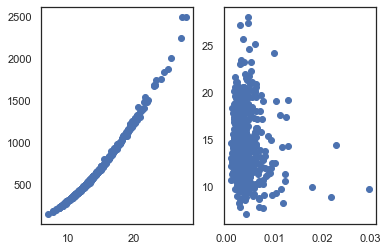

In [20]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance between radius mean and area mean: ",data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))
fig, axs = plt.subplots(1, 2)
axs[0].scatter(data.radius_mean, data.area_mean)
axs[1].scatter(data.fractal_dimension_se, data.radius_mean)
plt.show()

## Pearson Correlation Coefficient (Pearson Korelasyon Katsayısı)
* Pearson Correlation Coefficient: covariance'ı variable'ların standart deviation'ına bölüyoruz
* Division of covariance by standart deviation of variables
* radius mean and area mean arasındaki pearson correlation katsayısına bakalım
* Pearson Correlation Coefficient +1 ve -1 değerleri arasında değişir.
    * +1 = positive linear correlation
    * -1 = negative linear correlation
    *  0 = linear correlation yok 
* ![Time](pearson.jpg)

In [21]:
p1 = data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566132


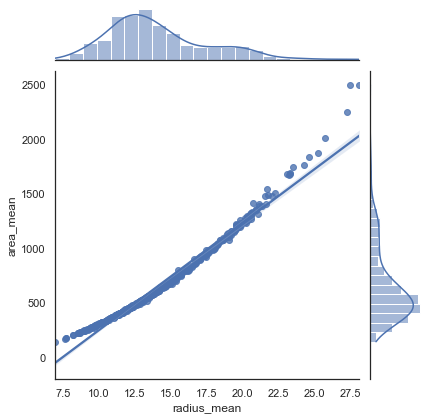

In [22]:
sns.jointplot(data.radius_mean,data.area_mean,kind="reg")
plt.show()

## Spearman Rank Coefficient (Spearman Rank Katsayısı)
* Pearson correlation works well if the relationship between variables are linear and variables are roughly normal. But it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value

In [23]:
ranked_data = data.rank() 
spearman_corr = ranked_data.loc[:,["area_mean","radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


In [24]:
# rank anlamak icin ornek
data1 = {'name': ['ali', 'veli', 'hakan', 'ayse', 'fatma'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data1, index = ['ankara', 'istanbul', 'sinop', 'bolu', 'izmir'])
df

,name,year,reports,coverage
ankara,ali,2012,4,25
istanbul,veli,2012,24,94
sinop,hakan,2013,31,57
bolu,ayse,2014,2,62
izmir,fatma,2014,3,70


In [25]:
df['coverageRanked'] = df['coverage'].rank(ascending=1)
df

,name,year,reports,coverage,coverageRanked
ankara,ali,2012,4,25,1.0
istanbul,veli,2012,24,94,5.0
sinop,hakan,2013,31,57,2.0
bolu,ayse,2014,2,62,3.0
izmir,fatma,2014,3,70,4.0
